### Plot nowcast-green monthly mean, std, min and max surface nitrate for the northern strait

Episodic nitrate supply to the surface waters of the northwestern Strait of Georgia; evident as a region of elevated mean (March-November) and standard deviation (April-September) of surface nitrate stretching from Discovery Passage to Baynes Sound in a monthly climatology based on simulations from fall 2014 to present.

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
from salishsea_tools import viz_tools
from matplotlib.ticker import FormatStrFormatter
import cmocean
from salishsea_tools import viz_tools, evaltools as et
import matplotlib.gridspec as gridspec
import pickle
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
saveloc='/ocean/eolson/MEOPAR/analysis-elise/notebooks/NorthernNitrate/save/'
#saveloc='/data/eolson/MEOPAR/biomodelevalpaper/figsNNut/'

In [3]:
i0=115
i1=215
j0=580
j1=810
k=0

In [4]:
fmesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
lat=fmesh.variables['nav_lat'][j0:j1,i0:i1]
lon=fmesh.variables['nav_lon'][j0:j1,i0:i1]
tmask=fmesh.variables['tmask'][0,k,j0:j1,i0:i1]
#gdept_0,e3t_0
fmesh.close()

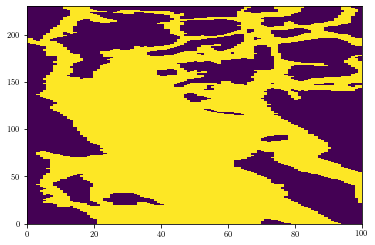

In [5]:
plt.pcolormesh(tmask)

In [6]:
mon={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [7]:
tlist=np.array([dt.datetime(2016,1,1)+dt.timedelta(days=ii) for ii in range(0,365)])
tlist[-1]

datetime.datetime(2016, 12, 30, 0, 0)

In [8]:
mm=np.array([ii.month for ii in tlist])
mm[0]

1

In [9]:
sourcedir='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'

In [10]:
with open(saveloc+'monthlySurfaceMeans2016.pkl', 'rb') as output:
    means=pickle.load(output)
with open(saveloc+'monthlySurfaceStds2016.pkl', 'rb') as output:
    stds=pickle.load(output)

In [11]:
cm1=plt.get_cmap('Purples')
cm1.set_bad('wheat')
cm2=plt.get_cmap('Greens')
cm2.set_bad('wheat')

[Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, '$\\geq$ ')]

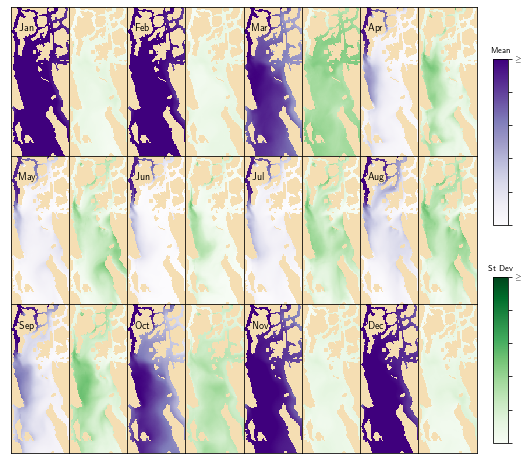

In [12]:
fig=plt.figure(figsize=(7.4,6.6))
gs0=gridspec.GridSpec(3,5,hspace=0,wspace=0,bottom=.03,left=.01,top=.97,right=.95,width_ratios=[1,1,1,1,.3])
ii=0
for jx in range(0,3):
    for ix in range(0,4):
        gsi=gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[jx,ix],width_ratios=[1,1],wspace=0)
        ax1=fig.add_subplot(gsi[0])
        ax2=fig.add_subplot(gsi[1])
        axi=[ax1,ax2,]
        p0=axi[0].pcolormesh(np.ma.masked_where(tmask==0,means[ii+1]),cmap=cm1,vmin=0,vmax=20)
        #axi[0].set_title(mon[ii+1]+' Mean Nitrate ($\mu$M N)')
        axi[0].get_xaxis().set_visible(False)
        axi[0].get_yaxis().set_visible(False)
        axi[0].set_ylim(0,230)
        axi[0].text(13.5,193,mon[ii+1])
        p1=axi[1].pcolormesh(np.ma.masked_where(tmask==0,stds[ii+1]),cmap=cm2,vmin=0,vmax=15)
        #fig.colorbar(p0,ax=axi[1])
        #axi[1].set_title(mon[ii+1]+' St Dev Nitrate ($\mu$M N)')
        axi[1].get_xaxis().set_visible(False)
        axi[1].get_yaxis().set_visible(False)
        axi[1].set_ylim(0,230)
        #ax[ii].suptitle(mon[ii+1])
        ii=ii+1
gscb=gridspec.GridSpecFromSubplotSpec(5,3,subplot_spec=gs0[:,4],hspace=0,wspace=0,width_ratios=[.9,.8,.2],
                                     height_ratios=[.25,.8,.25,.8,.05])
axcb0=fig.add_subplot(gscb[1,1])
axcb1=fig.add_subplot(gscb[3,1])
axcb0.set_title('Mean')
axcb1.set_title('St Dev')
cb0=fig.colorbar(p0,cax=axcb0,ticks=np.linspace(0,20,6))
test=cb0.ax.yaxis.get_ticklabels()
#test[0].set_text(u'\u2264{}'.format(test[0].get_text()))
#test[-1].set_text(u'\u2265{}'.format(test[-1].get_text()))
test[-1].set_text('$\geq$ {}'.format(test[-1].get_text()))
cb0.ax.yaxis.set_ticklabels(test)
cb1=fig.colorbar(p1,cax=axcb1,ticks=np.linspace(0,15,6))
test=cb1.ax.yaxis.get_ticklabels()
#test[0].set_text(u'\u2264{}'.format(test[0].get_text()))
#test[-1].set_text(u'\u2265{}'.format(test[-1].get_text()))
test[-1].set_text('$\geq$ {}'.format(test[-1].get_text()))
cb1.ax.yaxis.set_ticklabels(test)
##fig.savefig(saveloc+'surfaceMeanStd.png',dpi=200)
##fig.savefig(saveloc+'surfaceMeanStd.eps',dpi=200)

1.1363636363636362

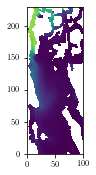

In [13]:
fig,ax=plt.subplots(1,1,figsize=(4.6,2.7))
ax.pcolormesh(np.ma.masked_where(tmask==0,means[6]))
ax.set_ylim(0,230)
viz_tools.set_aspect(ax)

[Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, '$\\geq$ ')]

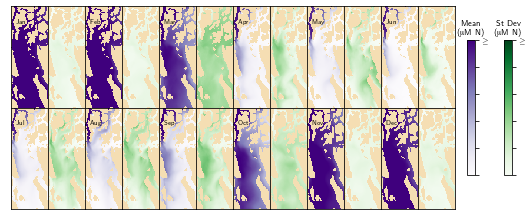

In [14]:
fig=plt.figure(figsize=(7.4,3))
gs0=gridspec.GridSpec(2,7,hspace=0,wspace=0,bottom=.03,left=.01,top=.97,right=.97,width_ratios=[1,1,1,1,1,1,.9])
ii=0
for jx in range(0,2):
    for ix in range(0,6):
        gsi=gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[jx,ix],width_ratios=[1,1],wspace=0)
        ax1=fig.add_subplot(gsi[0])
        ax2=fig.add_subplot(gsi[1])
        axi=[ax1,ax2,]
        p0=axi[0].pcolormesh(np.ma.masked_where(tmask==0,means[ii+1]),cmap=cm1,vmin=0,vmax=20)
        #axi[0].set_title(mon[ii+1]+' Mean Nitrate ($\mu$M N)')
        axi[0].get_xaxis().set_visible(False)
        axi[0].get_yaxis().set_visible(False)
        axi[0].set_ylim(0,230)
        axi[0].text(13,193,mon[ii+1],fontsize=6.5,fontweight='black',fontstretch='ultra-condensed')
        p1=axi[1].pcolormesh(np.ma.masked_where(tmask==0,stds[ii+1]),cmap=cm2,vmin=0,vmax=15)
        #fig.colorbar(p0,ax=axi[1])
        #axi[1].set_title(mon[ii+1]+' St Dev Nitrate ($\mu$M N)')
        axi[1].get_xaxis().set_visible(False)
        axi[1].get_yaxis().set_visible(False)
        axi[1].set_ylim(0,230)
        #ax[ii].suptitle(mon[ii+1])
        ii=ii+1
gscb=gridspec.GridSpecFromSubplotSpec(3,5,subplot_spec=gs0[:,6],hspace=0,wspace=0,width_ratios=[1.1,.7,2.8,.7,1],
                                     height_ratios=[.2,.8,.2])
axcb0=fig.add_subplot(gscb[1,1])
axcb1=fig.add_subplot(gscb[1,3])
axcb0.set_title('Mean\n($\muup$M N)')
axcb1.set_title('St Dev\n($\muup$M N)')
cb0=fig.colorbar(p0,cax=axcb0,ticks=np.linspace(0,20,6))
test=cb0.ax.yaxis.get_ticklabels()
#test[0].set_text(u'\u2264{}'.format(test[0].get_text()))
#test[-1].set_text(u'\u2265{}'.format(test[-1].get_text()))
test[-1].set_text('$\geq$ {}'.format(test[-1].get_text()))
cb0.ax.yaxis.set_ticklabels(test)
cb1=fig.colorbar(p1,cax=axcb1,ticks=np.linspace(0,15,6))
test=cb1.ax.yaxis.get_ticklabels()
#test[0].set_text(u'\u2264{}'.format(test[0].get_text()))
#test[-1].set_text(u'\u2265{}'.format(test[-1].get_text()))
test[-1].set_text('$\geq$ {}'.format(test[-1].get_text()))
cb1.ax.yaxis.set_ticklabels(test)
#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsNNut/surfaceMeanStd.png',dpi=200)
#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsNNut/surfaceMeanStd.eps',dpi=200)

1.1363636363636362

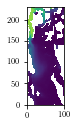

In [15]:
fig,ax=plt.subplots(1,1,figsize=(2,1.8))
ax.pcolormesh(np.ma.masked_where(tmask==0,means[6]))
ax.set_ylim(0,230)
viz_tools.set_aspect(ax)

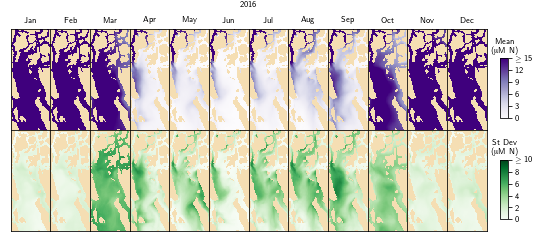

In [16]:
fig=plt.figure(figsize=(7.4,3.2))
gs0=gridspec.GridSpec(2,13,hspace=0,wspace=0,bottom=.02,left=.01,top=.9,right=.97,width_ratios=[1,1,1,1,1,1,1,1,1,1,1,1,.9])
ii=0

for ix in range(0,12):
    ax1=fig.add_subplot(gs0[0,ix])
    ax2=fig.add_subplot(gs0[1,ix])
    axi=[ax1,ax2,]
    p0=axi[0].pcolormesh(np.ma.masked_where(tmask==0,means[ii+1]),cmap=cm1,vmin=0,vmax=15)
    axi[0].get_xaxis().set_visible(False)
    axi[0].get_yaxis().set_visible(False)
    axi[0].set_ylim(0,230)
    axi[0].set_title(mon[ii+1])
    p1=axi[1].pcolormesh(np.ma.masked_where(tmask==0,stds[ii+1]),cmap=cm2,vmin=0,vmax=10)
    axi[1].get_xaxis().set_visible(False)
    axi[1].get_yaxis().set_visible(False)
    axi[1].set_ylim(0,230)
    ii=ii+1
gscb=gridspec.GridSpecFromSubplotSpec(6,3,subplot_spec=gs0[:,12],hspace=0,wspace=0,width_ratios=[1,.6,1],
                                     height_ratios=[.5,1,.2,.5,1,.2])
axcb0=fig.add_subplot(gscb[1,1])
axcb1=fig.add_subplot(gscb[4,1])
axcb0.set_title('Mean\n($\muup$M N)')
axcb1.set_title('St Dev\n($\muup$M N)')
cb0=fig.colorbar(p0,cax=axcb0,ticks=np.linspace(0,15,6))
labels=[str(int(ii)) for ii in np.linspace(0,15,6)]
labels[-1]=r'$\geq$ '+labels[-1]
cb0.ax.yaxis.set_ticklabels(labels)
cb1=fig.colorbar(p1,cax=axcb1,ticks=np.linspace(0,10,6))
labels=[str(int(ii)) for ii in np.linspace(0,10,6)]
labels[-1]=r'$\geq$ '+labels[-1]
cb1.ax.yaxis.set_ticklabels(labels)
ax1.annotate('2016',xy=(.46,.97),xycoords='figure fraction',ha='center',fontsize=8)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/response/surfaceMeanStd2016.png',dpi=200)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/response/surfaceMeanStd2016.eps',dpi=200)